### K-means analysis_ver1 : 외부온도 21-24도 K:5 or K:3
- xlsx : cluster summary, cluster summary_outtemp_21-24

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     339932 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      339932 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       339932 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      339932 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      339932 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      339932 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       339932 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       339932 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    339932 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

In [3]:
drop_list = ["Front_Seat_LH_Temp Unit: Degree ('c)",
       "Front_Seat_RH_Temp Unit: Degree('c)",
       "Rear_Seat_CT_Temp Unit: Degree('c)",
       "Front_Roof_CT_Temp Unit: Degree('c)",
       "Front_Roof_LH_Temp Unit: Degree('c)",
       "Front_Roof_RH_Temp Unit: Degree('c)",
       "Rear_Roof_LH_Temp Unit: Degree('c)",
       "Rear_Roof_RH_Temp Unit: Degree('c)",
       "DRV_LH_Vent_Wind_Velocity Unit: m / s",
       "DRV_RH_Vent_Wind_Velocity Unit: m / s",
       "DRV_Foot_Vent_Wind_Velocity Unit: m / s",
       "DRV_Seat_Vent_Wind_Velocity Unit: m / s",
       "PAS_LH_Vent_Wind_Velocity Unit: m / s",
       "PAS_RH_Vent_Wind_Velocity Unit: m / s",
       "PAS_Foot_Vent_Wind_Velocity Unit: m / s",
       "PAS_Seat_Vent_Wind_Velocity Unit: m / s", "5V_ADC_CH1 Unit: V",
       "5V_ADC_CH2 Unit: V", "5V_ADC_CH3 Unit: V", "5V_ADC_CH4 Unit: V",
       "5V_ADC_CH5 Unit: V", "PWM_CH8 Unit: PWM", "Frequency_CH8 Unit: Hz",
       "CR_Datc_DrModeAct","CR_Datc_TempAct", "CR_Datc_IntakeAct", "CR_Datc_AdsAct",
       "CR_Datc_DrVentTemp_C", "CR_Datc_DrFloorTemp_C", 
       "CR_Datc_ClimatePowSum_W", "LAT_ACCEL_m/s^2", "LONG_ACCEL_m/s^2",
       "YAW_RATE_'/s", "WHL_SPD_FL_km/h", "WHL_SPD_FR_km/h", "WHL_SPD_RL_km/h",
       "WHL_SPD_RR_km/h", 'CR_Datc_AcnCompSpdFB_rpm', 'CR_Datc_AptVal_PSI', 'CR_Datc_OutTemp_C', 
       'CR_Datc_OutTempC' ,'CR_Datc_EvapSnsTemp_C', 'CR_Datc_DrTempDispC', 'DATC_ModeDisp']

df = df.drop(drop_list, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CR_Datc_AcnCompPwrCon_W  339932 non-null  int64  
 1   CR_Datc_OutTempSnr_C     339932 non-null  float64
 2   CR_Datc_PTCPwrCon_W      339932 non-null  int64  
 3   CF_Datc_Heatpump_Mode    339932 non-null  int64  
 4   CR_Datc_SetTemp_C        339932 non-null  float64
 5   CR_Datc_IncarSnsTemp_C   339932 non-null  float64
 6   DATC_BlowerLevel         339932 non-null  int64  
 7   CR_Datc_PhotoSnsFB_V     339932 non-null  float64
 8   CR_Datc_Humidity         339932 non-null  float64
 9   CR_Mcu_VehSpd_Kph_sum    339932 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 25.9 MB


In [5]:
df.rename(columns={'CR_Datc_OutTempSnr_C': '외부 온도', 'CR_Datc_AcnCompPwrCon_W': '에어컨 압축기 전력 소비량',
                   'CR_Datc_PTCPwrCon_W': '히터의 전력 소비량', 'DATC_BlowerLevel': '바람세기', 'CF_Datc_Heatpump_Mode' : '히트 펌프',
                   'CR_Datc_SetTemp_C': '설정 온도', 'CR_Datc_IncarSnsTemp_C': '내부 온도', 
                   'CR_Datc_PhotoSnsFB_V' : '일사량', 'CR_Datc_Humidity' : '습도', 'CR_Mcu_VehSpd_Kph_sum' : '차량 속도'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339932 entries, 0 to 339931
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   에어컨 압축기 전력 소비량  339932 non-null  int64  
 1   외부 온도           339932 non-null  float64
 2   히터의 전력 소비량      339932 non-null  int64  
 3   히트 펌프           339932 non-null  int64  
 4   설정 온도           339932 non-null  float64
 5   내부 온도           339932 non-null  float64
 6   바람세기            339932 non-null  int64  
 7   일사량             339932 non-null  float64
 8   습도              339932 non-null  float64
 9   차량 속도           339932 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 25.9 MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
에어컨 압축기 전력 소비량,45617.0,237.830195,157.626953,0.00,0.00,270.000000,330.000000,780.000000
외부 온도,45617.0,22.433260,0.992768,21.00,21.50,22.500000,23.000000,24.000000
히터의 전력 소비량,45617.0,10.586623,91.449667,0.00,0.00,0.000000,0.000000,1570.000000
히트 펌프,45617.0,0.618761,1.804300,0.00,0.00,0.000000,0.000000,7.000000
설정 온도,45617.0,20.328277,1.574839,17.00,19.00,20.000000,22.000000,24.000000
내부 온도,45617.0,23.386544,1.901054,18.00,22.00,23.500000,25.000000,29.000000
바람세기,45617.0,3.494969,1.048741,0.00,3.00,4.000000,4.000000,7.000000
일사량,45617.0,0.306527,0.215988,0.06,0.14,0.240000,0.400000,0.920000
습도,45617.0,42.119802,9.712625,23.00,35.50,40.500000,48.000000,78.000000
차량 속도,45617.0,57.505997,35.470266,0.00,26.25,66.953125,86.039062,151.023438


In [7]:
df = df[(df['외부 온도'] >= 21) & (df['외부 온도'] <= 24)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45617 entries, 0 to 324775
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   에어컨 압축기 전력 소비량  45617 non-null  int64  
 1   외부 온도           45617 non-null  float64
 2   히터의 전력 소비량      45617 non-null  int64  
 3   히트 펌프           45617 non-null  int64  
 4   설정 온도           45617 non-null  float64
 5   내부 온도           45617 non-null  float64
 6   바람세기            45617 non-null  int64  
 7   일사량             45617 non-null  float64
 8   습도              45617 non-null  float64
 9   차량 속도           45617 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.8 MB


In [9]:
X=df

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.

WCSS: [456170.0000000005, 377905.5740497641, 319993.36140611366, 279279.08315189485, 241782.72353938513, 221908.58318068384, 206371.87476086087]


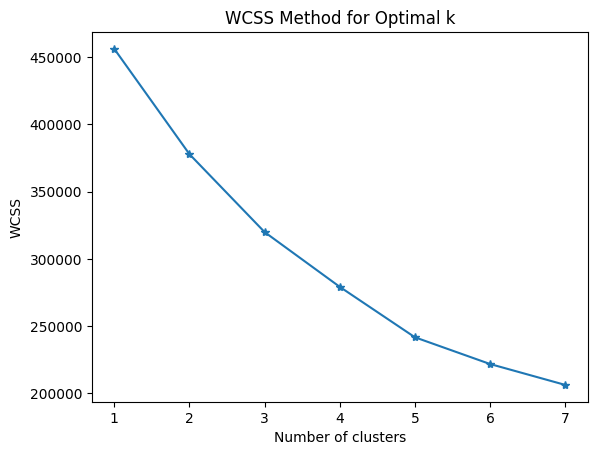

Silhouette Scores: [0.18052276346903562, 0.19499278161519898, 0.2241685879800304, 0.23916702594021452, 0.2136723887704358, 0.2380381150499696]


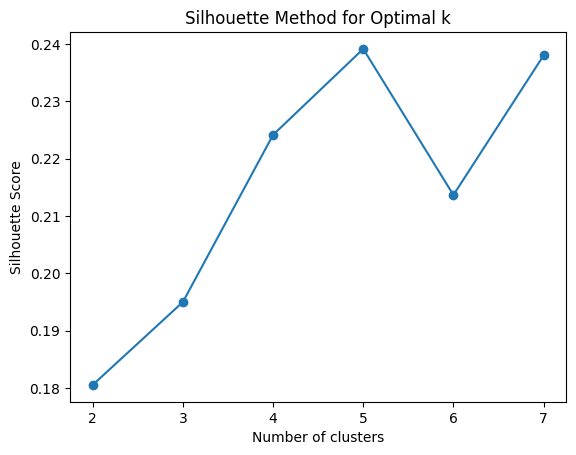

Optimal number of clusters based on silhouette score: 5


In [19]:
# 데이터프레임과 X 설정
# df = ... (데이터프레임 설정)
# X = df[['feature1', 'feature2', ...]].values  # 클러스터링할 특징 선택 가능

# WCSS와 실루엣 점수를 저장할 리스트 초기화
wcss = []
silhouette_scores = []

# 클러스터 수 1부터 8까지에 대해  K-Means 수행
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X_scaled)

    # WCSS 저장 
    wcss.append(kmeans.inertia_)

    # 클러스터 수 2부터에 대해서만 실루엣 점수 계산
    if i > 1 : 
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

# WCSS 결과 출력 및 그래프 그리기
print("WCSS:", wcss)
plt.plot(range(1, 8), wcss, marker='*')
plt.title('WCSS Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 8))
plt.show()

# 실루엣 점수 결과 출력 및 그래프 그리기
print("Silhouette Scores:", silhouette_scores)
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,8))
plt.show()

# 최적의 클러스터 수 찾기
optimal_k = np.argmax(silhouette_scores) + 2  # range 시작이 2이므로 인덱스에 2를 더함
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

In [19]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/home/miserver10/workspace_vscode/K-means/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/tmp/ipykernel_53709/4085950232.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')


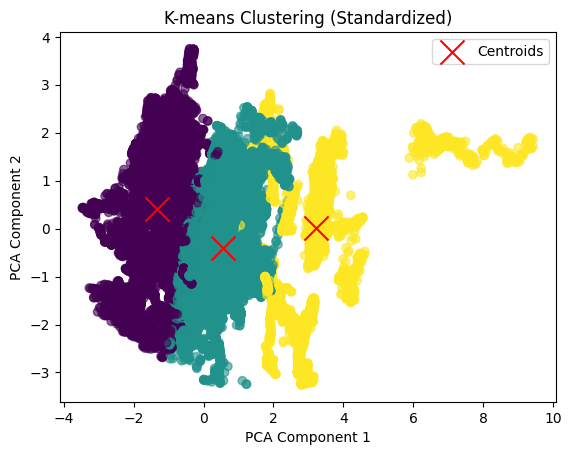

In [21]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=300, c='red', edgecolors='k', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (Standardized)')
plt.legend()
plt.show()

In [22]:
df['Cluster'] = labels 

cluster_summary_original_scale = df.groupby('Cluster').mean()
print("\nCluster Summary on Original Scale (Mean Values):")
print(cluster_summary_original_scale)


Cluster Summary on Original Scale (Mean Values):
         에어컨 압축기 전력 소비량      외부 온도  히터의 전력 소비량     히트 펌프      설정 온도  \
Cluster                                                               
0            344.466889  22.906388    0.000000  0.001095  19.033360   
1            189.562992  22.037109    0.000000  0.009271  21.432372   
2              0.000000  22.161780  100.422125  5.824912  20.985756   

             내부 온도      바람세기       일사량         습도      차량 속도  
Cluster                                                       
0        21.863053  3.575800  0.297774  40.715160  58.517242  
1        24.350017  3.401275  0.267123  42.683012  56.855407  
2        25.604907  3.560616  0.512793  45.565086  56.081182  


In [23]:
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary on Original Scale (Mean Values):")
print(cluster_summary)

# 결과를 엑셀 파일로 저장합니다
output_file = 'cluster_summary_outtemp_21-24.xlsx'
cluster_summary.to_excel(output_file, index=True)

print(f"\nCluster summary has been saved to {output_file}")


Cluster Summary on Original Scale (Mean Values):
         에어컨 압축기 전력 소비량      외부 온도  히터의 전력 소비량     히트 펌프      설정 온도  \
Cluster                                                               
0            344.466889  22.906388    0.000000  0.001095  19.033360   
1            189.562992  22.037109    0.000000  0.009271  21.432372   
2              0.000000  22.161780  100.422125  5.824912  20.985756   

             내부 온도      바람세기       일사량         습도      차량 속도  
Cluster                                                       
0        21.863053  3.575800  0.297774  40.715160  58.517242  
1        24.350017  3.401275  0.267123  42.683012  56.855407  
2        25.604907  3.560616  0.512793  45.565086  56.081182  

Cluster summary has been saved to cluster_summary_outtemp_21-24.xlsx
